<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_4/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 10/28/2025 <br>
ECGR 4105 - Homework 4, Problem 2

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import .csv dataset from class repository
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
df = pd.read_csv(url)
print(df.head()) #Confirm successful import by printing

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
#Map non-numerical data to numbers
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Define the values to be mapped
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
#Replace strings with numerical equivalents
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
#Assign input and output variables
X = df.iloc[:, 1:12].values #input
Y = df.iloc[:, 0].values #output

In [ ]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
#Feature scaling (normalization)
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_Y = MinMaxScaler() # Create a scaler for Y

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Reshape Y for scaling
Y_train_scaled = sc_Y.fit_transform(Y_train.reshape(-1, 1))
Y_test_scaled = sc_Y.transform(Y_test.reshape(-1, 1))

print("Scaled X_train (first 5 rows):")
print(X_train[:5])
print("\nScaled Y_train (first 5 rows):")
print(Y_train_scaled[:5])

Scaled X_train (first 5 rows):
[[0.12419939 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.08382066 0.2        0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.12280702 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.55861877 0.4        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]]

Scaled Y_train (first 5 rows):
[[0.        ]
 [0.08181818]
 [0.0969697 ]
 [0.07272727]
 [0.23939394]]


In [ ]:
#Import Support Vector Regression
from sklearn.svm import SVR

#Fit regression model
# Adjust C and gamma to control overfitting for RBF kernel
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Adjust C to control overfitting for Linear kernel
svr_lin = SVR(kernel='linear', C=1e3)
# Adjust C and degree to control overfitting for Polynomial kernel
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# Fit models on training data (using scaled Y_train)
svr_rbf.fit(X_train, Y_train_scaled.ravel()) # Use ravel() to convert to 1D array
svr_lin.fit(X_train, Y_train_scaled.ravel())
svr_poly.fit(X_train, Y_train_scaled.ravel())

# Predict on test data
Y_lin_pred_scaled = svr_lin.predict(X_test)
Y_poly_pred_scaled = svr_poly.predict(X_test)
Y_rbf_pred_scaled = svr_rbf.predict(X_test)

# Inverse scale the predictions
Y_lin_pred = sc_Y.inverse_transform(Y_lin_pred_scaled.reshape(-1, 1))
Y_poly_pred = sc_Y.inverse_transform(Y_poly_pred_scaled.reshape(-1, 1))
Y_rbf_pred = sc_Y.inverse_transform(Y_rbf_pred_scaled.reshape(-1, 1))

# Flatten the inverse scaled predictions back to 1D arrays for consistency
Y_lin_pred = Y_lin_pred.ravel()
Y_poly_pred = Y_poly_pred.ravel()
Y_rbf_pred = Y_rbf_pred.ravel()

In [ ]:
#Observe predictions from trained model
from tabulate import tabulate
# Combine the data into a list of lists
data = list(zip(Y_test[:3], Y_lin_pred[:3], Y_poly_pred[:3], Y_rbf_pred[:3]))
# Define the headers for the table
headers = ["Actual", "Linear", "Polynomial", "RBF"]
# Create and print the table
print(tabulate(data, headers=headers, tablefmt="grid", numalign="right", floatfmt=".0f"))

+----------+----------+--------------+---------+
|   Actual |   Linear |   Polynomial |     RBF |
+==========+==========+==============+=========+
|  4585000 |  3664645 |      3911320 | 3986085 |
+----------+----------+--------------+---------+
|  6083000 |  5881867 |      6626646 | 7959516 |
+----------+----------+--------------+---------+
|  4007500 |  4530128 |      3561135 | 3319043 |
+----------+----------+--------------+---------+


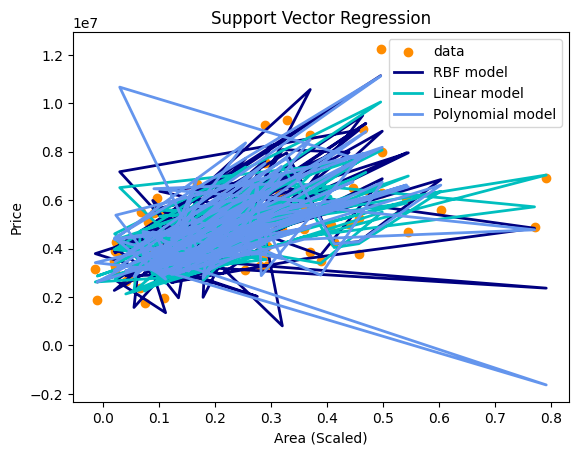

In [ ]:
# Use the first feature of X_test for plotting (which is 'area' after encoding and scaling)
X_test_plot = X_test[:, 0]
lw = 2
plt.scatter(X_test_plot, Y_test, color='darkorange', label='data')
plt.plot(X_test_plot, Y_rbf_pred, color='navy', lw=lw, label='RBF model')
plt.plot(X_test_plot, Y_lin_pred, color='c', lw=lw, label='Linear model')
plt.plot(X_test_plot, Y_poly_pred, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('Area (Scaled)')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
r2_lin = r2_score(Y_test, Y_lin_pred)
r2_poly = r2_score(Y_test, Y_poly_pred)
r2_rbf = r2_score(Y_test, Y_rbf_pred)

# Print the R-squared values
print("Linear Kernel R-squared:", f"{r2_lin:.4f}")
print("Polynomial Kernel R-squared:", f"{r2_poly:.4f}")
print("RBF Kernel R-squared:", f"{r2_rbf:.4f}")

Linear Kernel R-squared: 0.6492
Polynomial Kernel R-squared: 0.2723
RBF Kernel R-squared: 0.1467
